<a href="https://colab.research.google.com/github/amitsiwach/Digital_image_processing/blob/main/Image_processing_using_Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image processing using Scipy
Scipy is a python library that is part of numpy stack. 
It contains modules for linear algebra, FFT, signal processing and
image processing. Not designed for image processing but has a few tools


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from scipy import misc
img = misc.imread("/content/drive/MyDrive/Images/monkey.jpg")
print(type(img))   #numpy array

AttributeError: ignored

In [7]:
from skimage import io
img = io.imread("/content/drive/MyDrive/Images/monkey.jpg")
print(type(img))   #numpy array

<class 'numpy.ndarray'>


In [8]:
print(img.shape, img.dtype)

(600, 354, 3) uint8


In [9]:
img = io.imread("/content/drive/MyDrive/Images/monkey.jpg", as_gray=True)
print(img.shape, img.dtype)

(600, 354) float64


In [10]:
from skimage import io, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

In [11]:
img = img_as_ubyte(io.imread("/content/drive/MyDrive/Images/monkey.jpg", as_gray=True))
print(img.shape, img.dtype)
#img_as_ubyte converts image to 8 bit unsigned int.

(600, 354) uint8


In [12]:
#individual pixel values
print(img[0,0])   #reports pixel value at 0,0. Remove img_as_ubte and see the value.
#also make as_grey=True and see the above values

177


In [13]:
#pixel values from a slice
print(img[10:15, 20:25])  #Values from a slice

[[179 178 177 175 175]
 [178 179 179 176 175]
 [179 181 180 177 177]
 [182 182 181 179 179]
 [187 185 183 181 182]]


178.84663370998118 0 255


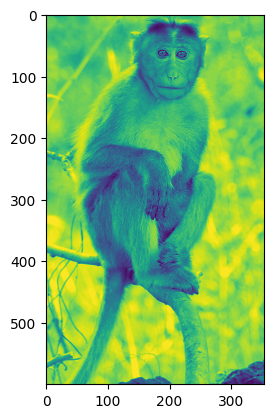

In [14]:
mean_grey = img.mean()
max_value = img.max()
min_value = img.min()
print(mean_grey, min_value, max_value)
plt.imshow(img)

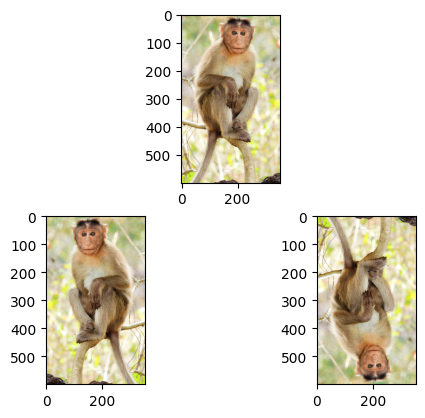

In [17]:
#geometric transformation
#flipped

img = img_as_ubyte(io.imread("/content/drive/MyDrive/Images/monkey.jpg", as_gray=False))

flipped_img_LR = np.fliplr(img)
flipped_img_UD = np.flipud(img)

plt.subplot(2,1,1)
plt.imshow(img, cmap="Greys")
plt.subplot(2,2,3)
plt.imshow(flipped_img_LR)
plt.subplot(2,2,4)
plt.imshow(flipped_img_UD)

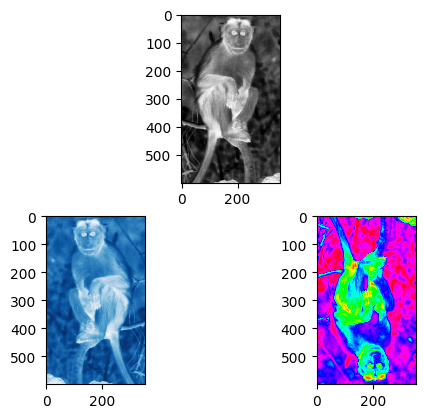

In [19]:
img = img_as_ubyte(io.imread("/content/drive/MyDrive/Images/monkey.jpg", as_gray=True))

flipped_img_LR = np.fliplr(img)
flipped_img_UD = np.flipud(img)

plt.subplot(2,1,1)
plt.imshow(img, cmap="Greys")
plt.subplot(2,2,3)
plt.imshow(flipped_img_LR, cmap="Blues")
plt.subplot(2,2,4)
plt.imshow(flipped_img_UD, cmap="hsv")

#### For all other options: https://matplotlib.org/tutorials/colors/colormaps.html

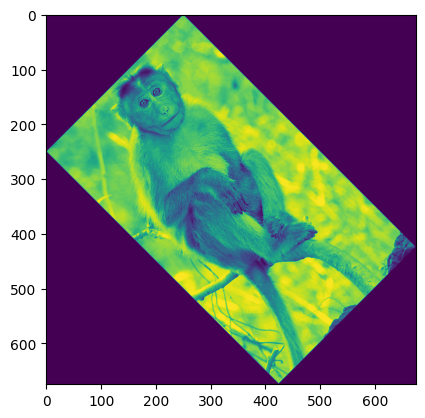

In [21]:
#Rotation
rotated_img = ndimage.rotate(img, 45)
plt.imshow(rotated_img)

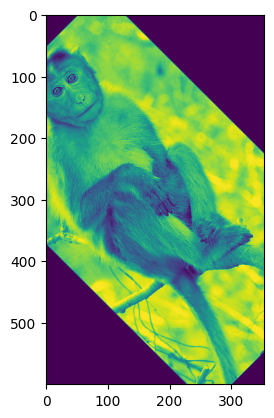

In [22]:
rotated_img_noreshape = ndimage.rotate(img, 45, reshape=False)
plt.imshow(rotated_img_noreshape)

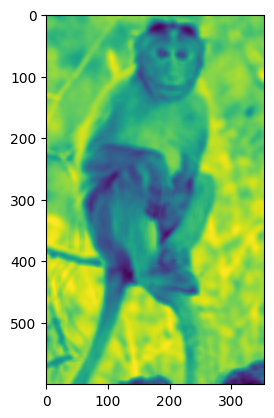

In [24]:
uniform_filtered_img = ndimage.uniform_filter(img, size=9)
plt.imshow(uniform_filtered_img)

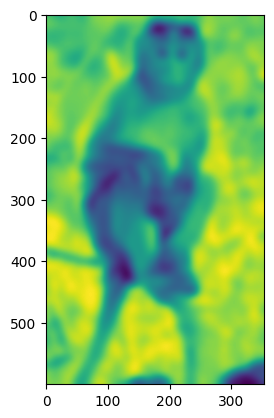

In [26]:
#Gaussian filter: from scipy.ndimage
# Gaussian filter smooths noise but also edges

blurred_img = ndimage.gaussian_filter(img, sigma=7)  #also try 5, 7
plt.imshow(blurred_img)

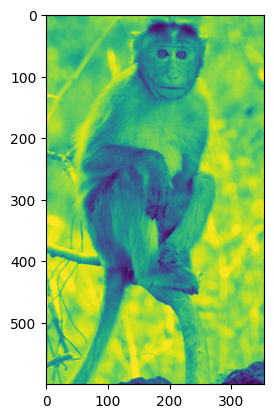

In [27]:
#Median filter is better than gaussian. A non-local means is even better
median_img = ndimage.median_filter(img, 3)
plt.imshow(median_img)

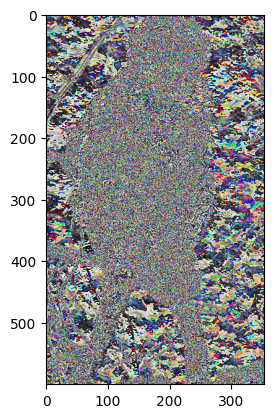

In [30]:
#Edge detection
img = img_as_ubyte(io.imread("/content/drive/MyDrive/Images/monkey.jpg", as_gray=False))
sobel_img = ndimage.sobel(img, axis=0)  #Axis along which to calculate sobel
plt.imshow(sobel_img)

#### for a list of all filters
 https://docs.scipy.org/doc/scipy/reference/ndimage.html